# Table of Contents <a class="anchor" id="start"></a>
* [Description of Data](#chapter0)
* [Data Schema](#chapter1)
* [Data Overview and Preprocessing](#chapter2)
    * [Importing libraries](#section_2_1)
    * [Downloading data](#section_2_2)
    * [Data overview](#section_2_3)
    * [Check for missing records in the related tables](#section_2_4)
    * [Changing date format](#section_2_5)
    * [Summary of data overview and preprocessing](#section_2_6)
* [Exploratory Data Analysis (EDA)](#chapter3)
    * [Importing csv into SQLite database](#section_3_1) 
    * [Revenue and number of orders by month](#section_3_2)
    * [Number of orders by day](#section_3_3)  
    * [Growth of total number unique customers by month](#section_3_4)
    * [Revenue by payment type ](#section_3_5)
    * [Number of orders by payment type (with combined)](#section_3_6)    
    * [Top 10 and bottom 10 of product category by revenue](#section_3_7)
* [RFM Analysis](#chapter4)
    * [About RFM analysis](#section_4_1)
    * [Calculation of Recency, Frequency and Monetary](#section_4_2)
    * [RFM score](#section_4_3)
    * [Customer segmentation](#section_4_4) 

## Description of Data <a class="anchor" id="chapter0"></a>

In this project is used a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

Dataset is available by link: https://www.kaggle.com/olistbr/brazilian-ecommerce

## Data Schema <a class="anchor" id="chapter1"></a>

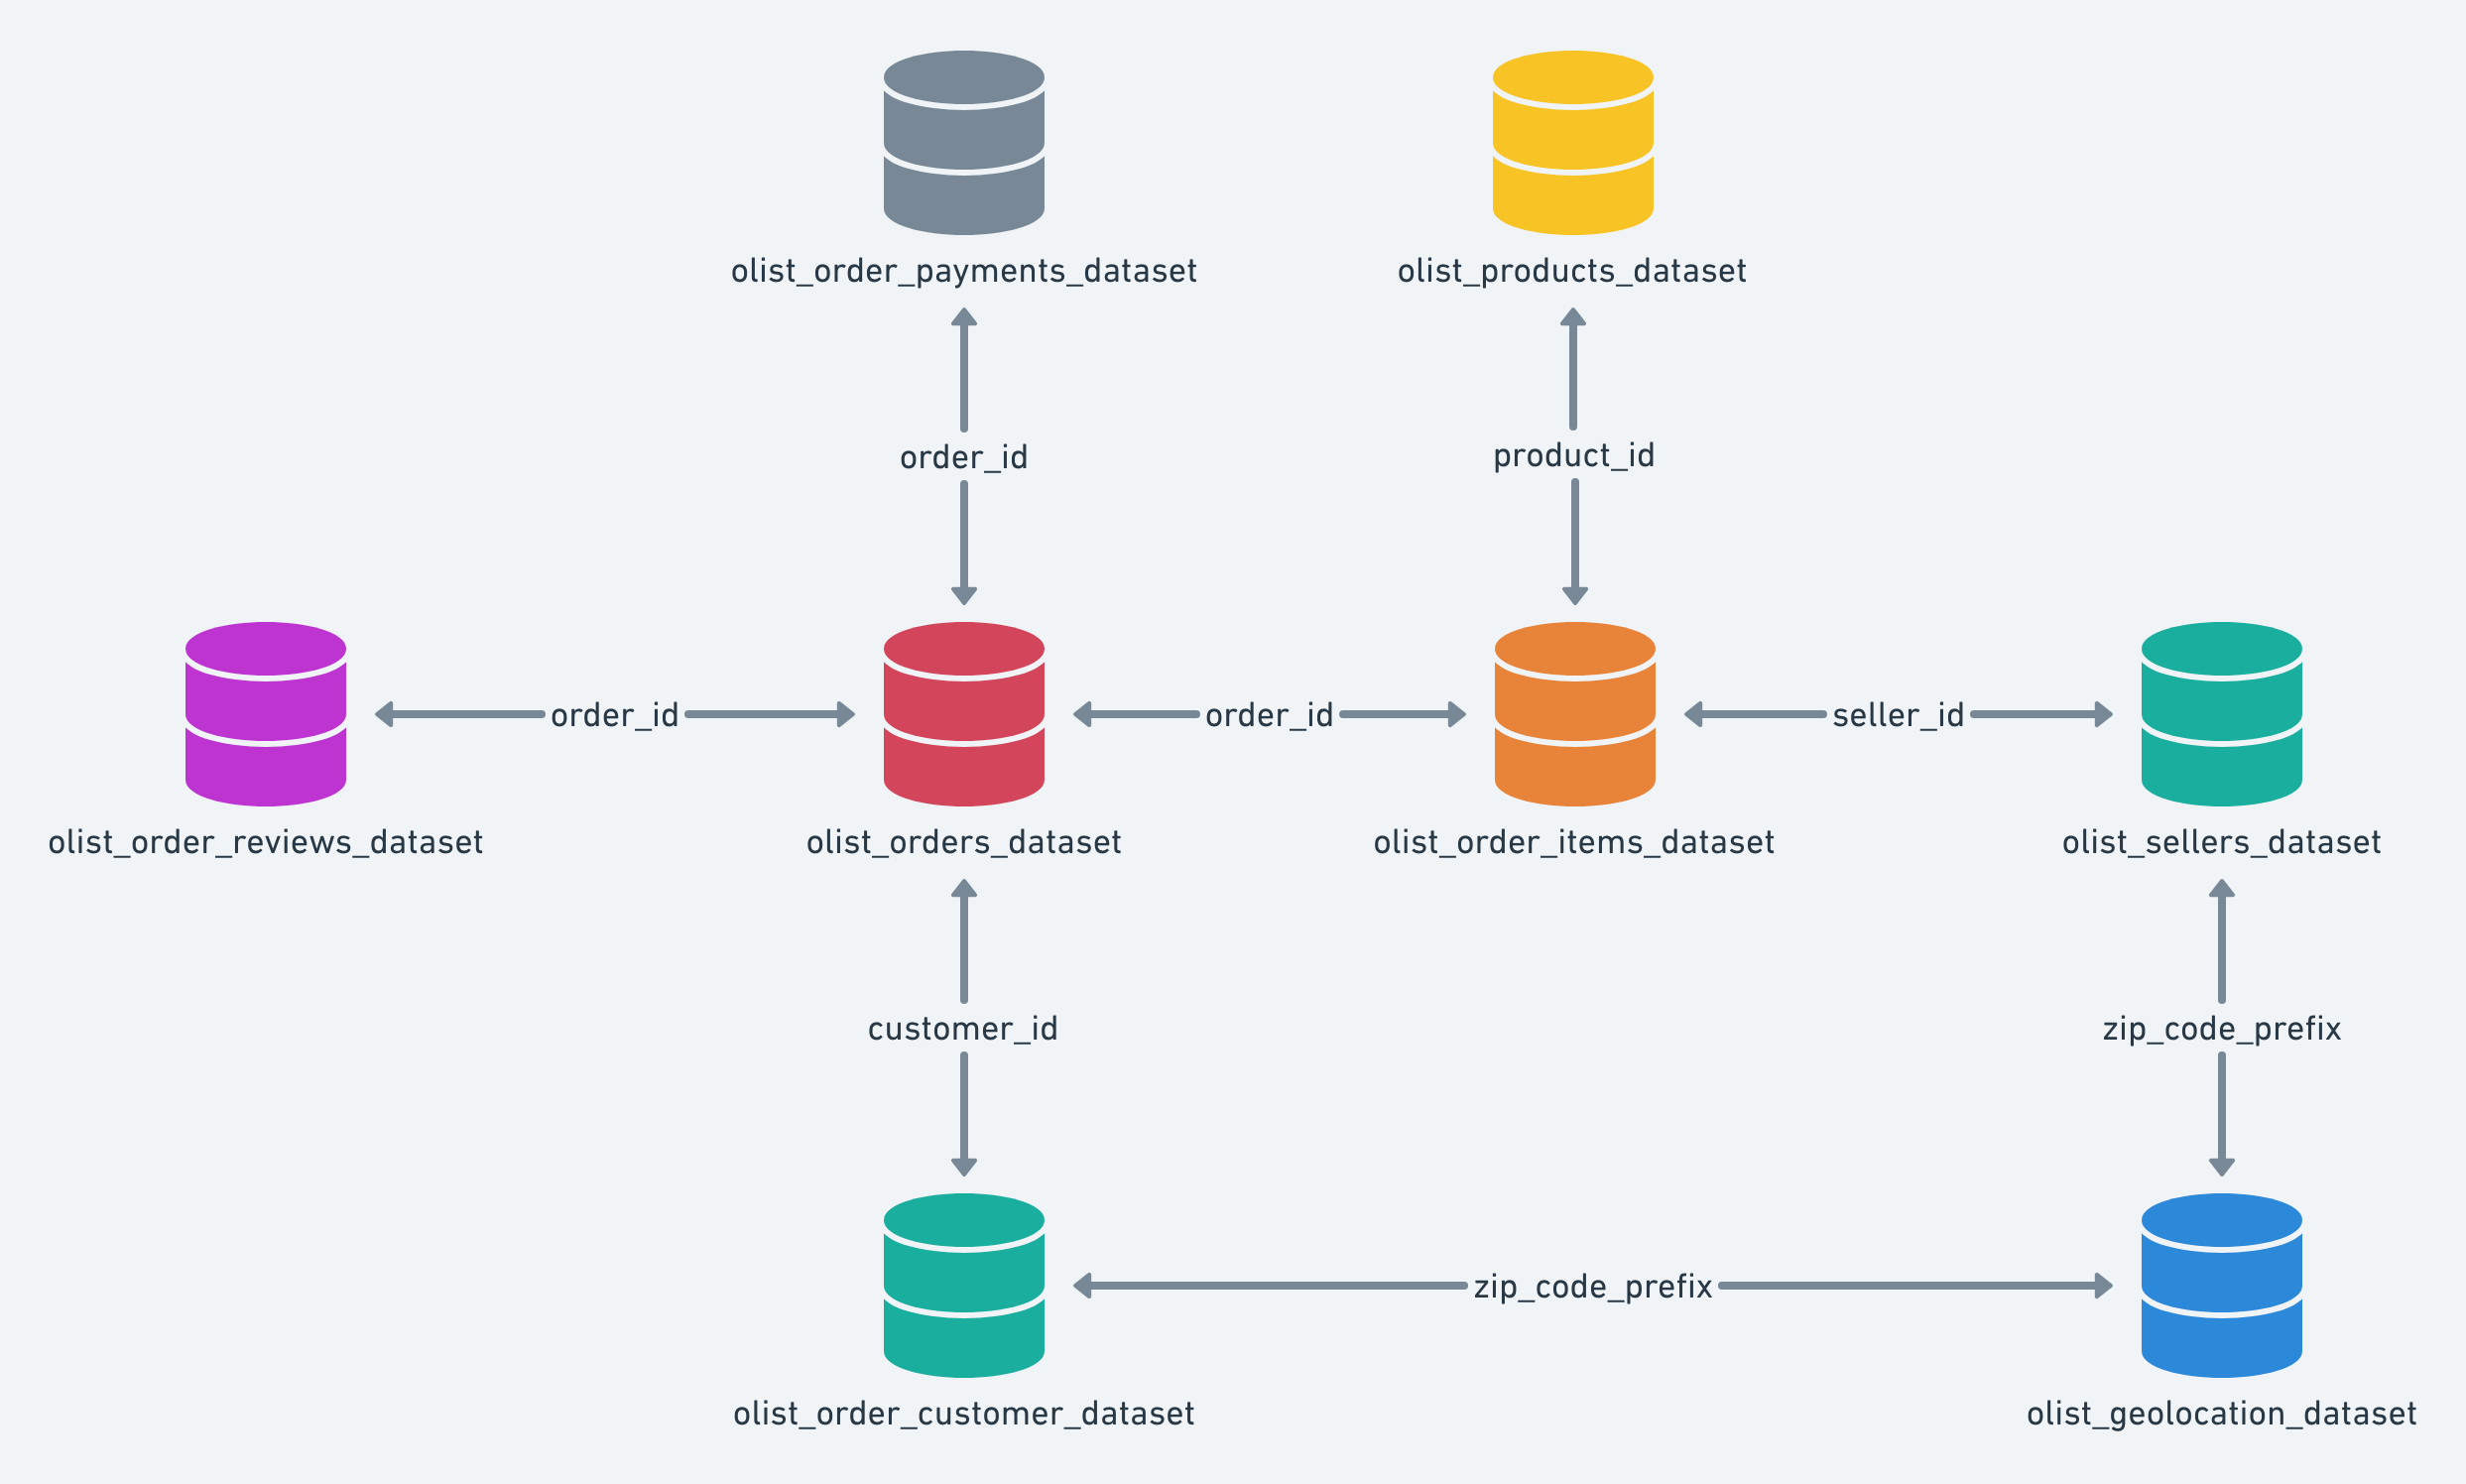

[Back to Start](#start)

## Data Overview and Preprocessing <a class="anchor" id="chapter2"></a>

### Importing Libraries <a class="anchor" id="section_2_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import squarify
import sqlite3
import datetime

### Downloading Data <a class="anchor" id="section_2_2"></a>

In [2]:
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_product_category_name_transl = pd.read_csv('product_category_name_translation.csv')

### Data Overview <a class="anchor" id="section_2_3"></a>

In [3]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [13]:
df_product_category_name_transl.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
df_product_category_name_transl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [15]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [17]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [18]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [19]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [20]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


[Back to Start](#start)

### Check for Missing Records in the Related Tables <a class="anchor" id="section_2_4"></a>

Table "orders" is the core table for this dataset. It contains NaNs in some date fields. It is necessary to check them.

In [21]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
# List of unique order status:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [23]:
df_orders.groupby('order_status')\
    [['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']]\
    .apply(lambda x: x.isnull().sum())\
    .sort_values(by=['order_status'] ,key= lambda x: x.map({'delivered':0, 'shipped':1,\
                                        'canceled':8, 'invoiced':5, 'processing':6,\
                                        'unavailable': 3, 'approved':4, 'created':7}))

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
order_status,,,
delivered,14,2,8
shipped,0,0,1107
unavailable,0,609,609
approved,0,2,2
invoiced,0,314,314
processing,0,301,301
created,5,5,5
canceled,141,550,619


Some "delivered" orders have missed values in the fields ("order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date").
The large number of such errors can affect the correctness of the calculation of some metrics.

Noticed that customers have opportunity to cancel an order on all stages (either immediately after its execution and after successful delivery.

Before joining tables further, it is necessary to check that information about all orders from the "orders" table is contained in the related tables ("order_payments", "order_items", "order_reviews").

In [24]:
df_orders['order_id'].nunique()

99441

In [25]:
df_order_payments['order_id'].nunique()

99440

Number of unique orders in "order_payments" table differs from number of unique orders in "orders" table by 1 order.

In [26]:
df_orders.merge(df_order_payments, how ='left', on='order_id', indicator= True)\
         .query('_merge == "left_only"')\
         .drop('_merge', axis = 1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
32133,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,NaN,NaN,NaN,NaN


There is no any payment information for 1 "delivered" order.

In [27]:
df_order_items['order_id'].nunique()

98666

Number of unique orders in "order_items" table is less than in "orders" table. So we have missed information about products for 775 orders.

In [28]:
df_orders.merge(df_order_items, how ='left', on='order_id', indicator= True)\
         .query('_merge == "left_only"')\
         .drop('_merge', axis = 1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
306,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
671,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
791,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
850,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1294,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113204,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
113236,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
113324,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
113325,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_orders.merge(df_order_items, how ='left', on='order_id', indicator= True)\
         .query('_merge == "left_only"')\
         .drop('_merge', axis = 1)\
         .groupby('order_status')['order_id'].nunique()

order_status
canceled       164
created          5
invoiced         2
shipped          1
unavailable    603
Name: order_id, dtype: int64

Mostly these are orders with the status “cancelled” and “unavailable”, but there are also orders that have just been created and even an order with status "shipped".

In [30]:
df_order_reviews['order_id'].nunique()

98673

In [31]:
df_orders.merge(df_order_reviews, how ='left', on='order_id', indicator= True)\
         .query('_merge == "left_only"')\
         .drop('_merge', axis = 1)\
         .groupby('order_status')['order_id'].nunique()

order_status
canceled        20
created          2
delivered      646
invoiced         5
processing       6
shipped         75
unavailable     14
Name: order_id, dtype: int64

In [32]:
df_products['product_category_name'].isna().sum()

610

610 products from "products" table have empty "product_category_name" field.

In [33]:
df_products['product_category_name'].nunique()

73

In [34]:
df_product_category_name_transl['product_category_name'].nunique()

71

In [35]:
df_products.merge(df_product_category_name_transl, how ='left', on='product_category_name', indicator= True)\
         .query('_merge == "left_only"')['product_category_name'].unique()

array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

Not all product categories from the "products" table have an English translation in the "product_category_name_translation" table. In order not to lose data on these product categories in reports, it would be more correct to substitute their original names.

Also it is necessary to check the number of unique customers, sellers and products in the related tables.

In [36]:
df_customers['customer_unique_id'].nunique()

96096

In [37]:
df_customers['customer_id'].nunique()

99441

In [38]:
df_orders['customer_id'].nunique()

99441

In [39]:
df_sellers['seller_id'].nunique()

3095

In [40]:
df_order_items['seller_id'].nunique()

3095

In [41]:
df_products['product_id'].nunique()

32951

In [42]:
df_order_items['product_id'].nunique()

32951

[Back to Start](#start)

### Changing Date Format <a class="anchor" id="section_2_5"></a>

Convert timestamp columns to datetime datatype.

In [43]:
time_columns = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
                'order_delivered_customer_date', 'order_estimated_delivery_date']

In [44]:
for i in time_columns:
    df_orders[i] = pd.to_datetime(df_orders[i])

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [45]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

In [46]:
df_order_reviews['review_creation_date'] = pd.to_datetime(df_order_reviews['review_creation_date'])
df_order_reviews['review_answer_timestamp'] = pd.to_datetime(df_order_reviews['review_answer_timestamp'])

### Summary of Data Overview and Preprocessing <a class="anchor" id="section_2_6"></a>

Provided dataset consists of 8 related tables, including information about orders, customers, sellers, payment information and order items, in particular product details.
During data overview, several key findings were uncovered:


1. No duplicates were detected (the number of unique values for each table corresponds to the number of rows in that table)
1. The datatype was changed from "object" to "datetime" for some date fields from tables ‘orders’, ‘order_items’ and ‘order_reviews’ 
1. Dataset containe some missing records of the order details in the related tables. 1 delivered order without any payment information, 775 orders without any product information
1. Each order can contain multiple order items. Each order can be paid through multiple payment sources. So joining these tables together in one SQL-query we can get duplicate (multiplying) records.
1. Not all product categories from the "products" table have an English translation in the ‘product_category_name_translation’ table. In order not to lose data on these product categories in reports, it would be more correct to substitute their original names.
1. Table ‘orders’ have missing values in the date fields ("order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"). The large number of such errors can affect the correctness of the calculation of some metrics.

[Back to Start](#start)

## Exploratory Data Analysis (EDA) <a class="anchor" id="chapter3"></a>

EDA is an important step in the data analysis process, as it helps in understanding the data, identifying the patterns, trends and relationships that exist within the data, allows you to check for data quality issues, such as missing values, outliers, or incorrect values, and preparing the data for further analysis.

### Importing csv into SQLite Database <a class="anchor" id="section_3_1"></a>

In [47]:
engine = sqlite3.connect("olist.db")

In [48]:
df_customers.to_sql('customers', engine, if_exists='replace')
df_orders.to_sql('orders', engine, if_exists='replace')
df_products.to_sql('products', engine, if_exists='replace')
df_sellers.to_sql('sellers', engine, if_exists='replace')
df_order_items.to_sql('order_items', engine, if_exists='replace')
df_order_payments.to_sql('order_payments', engine, if_exists='replace')
df_order_reviews.to_sql('order_reviews', engine, if_exists='replace')
df_geolocation.to_sql('geolocation', engine, if_exists='replace')
df_product_category_name_transl.to_sql('product_category', engine, if_exists='replace')

71

### Revenue and Number of Orders by Month <a class="anchor" id="section_3_2"></a>

In [49]:
orders_m = pd.read_sql("""
SELECT  strftime('%Y-%m',orders.order_purchase_timestamp) as month
       ,count(distinct orders.order_id) as orders_count
       ,sum(order_payments.payment_value) as revenue
FROM orders
LEFT JOIN order_payments ON order_payments.order_id = orders.order_id
WHERE orders.order_status not in ('canceled', 'unavailable')
GROUP BY month
ORDER BY month
""", engine)

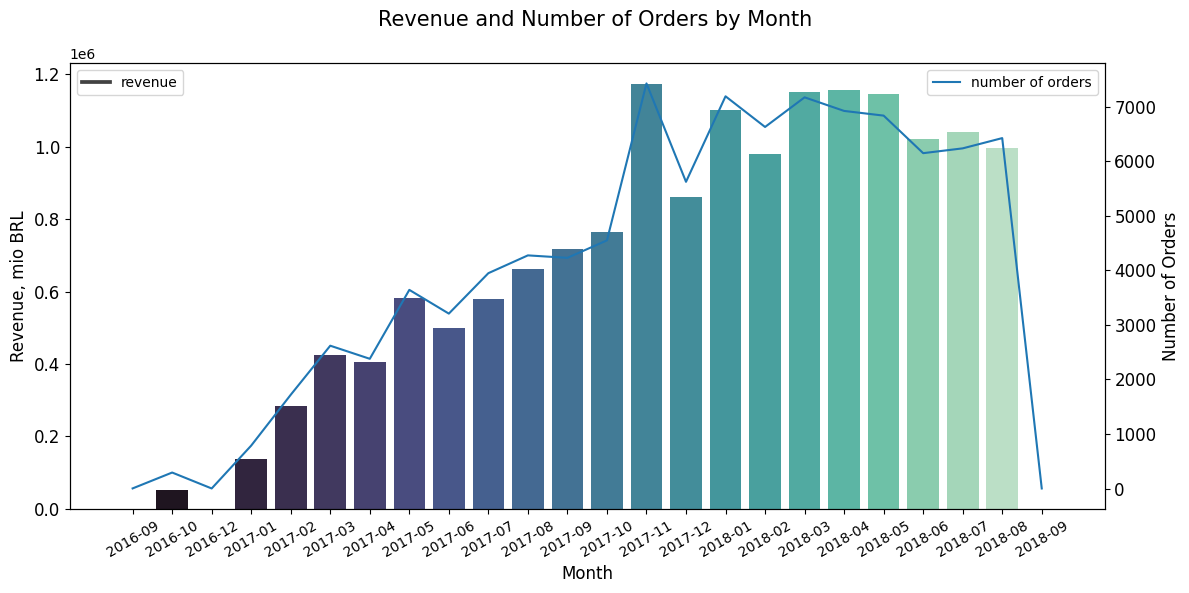

In [50]:
fig, ax1 = plt.subplots(figsize = (12, 6))
sns.barplot(data = orders_m, x = "month", y = "revenue", palette = 'mako', ax = ax1)
ax1.set_xlabel("Month", fontsize = 12)
ax1.set_ylabel("Revenue, mio BRL", fontsize = 12)
ax1.tick_params(axis = 'x', labelsize = 10, rotation=30)
ax1.tick_params(axis = 'y', labelsize = 12)
ax1.legend(['revenue'], loc="upper left")

ax2 = ax1.twinx()
sns.lineplot(data = orders_m, x = "month", y = "orders_count", ax = ax2)
ax2.set_ylabel("Number of Orders", fontsize = 12)
ax2.tick_params(axis = 'y', labelsize = 12)
ax2.legend(['number of orders'], loc="upper right")

plt.suptitle("Revenue and Number of Orders by Month", fontsize = 15)
plt.tight_layout()
plt.show()

[Back to Start](#start)

### Number of Orders by Day <a class="anchor" id="section_3_3"></a>

In [51]:
orders_d = pd.read_sql("""
SELECT  strftime('%Y-%m-%d',orders.order_purchase_timestamp) as day
       ,count(distinct orders.order_id) as orders_count
FROM orders
LEFT JOIN order_payments ON order_payments.order_id = orders.order_id
WHERE orders.order_status not in ('canceled', 'unavailable')
GROUP BY day
ORDER BY day
""", engine)

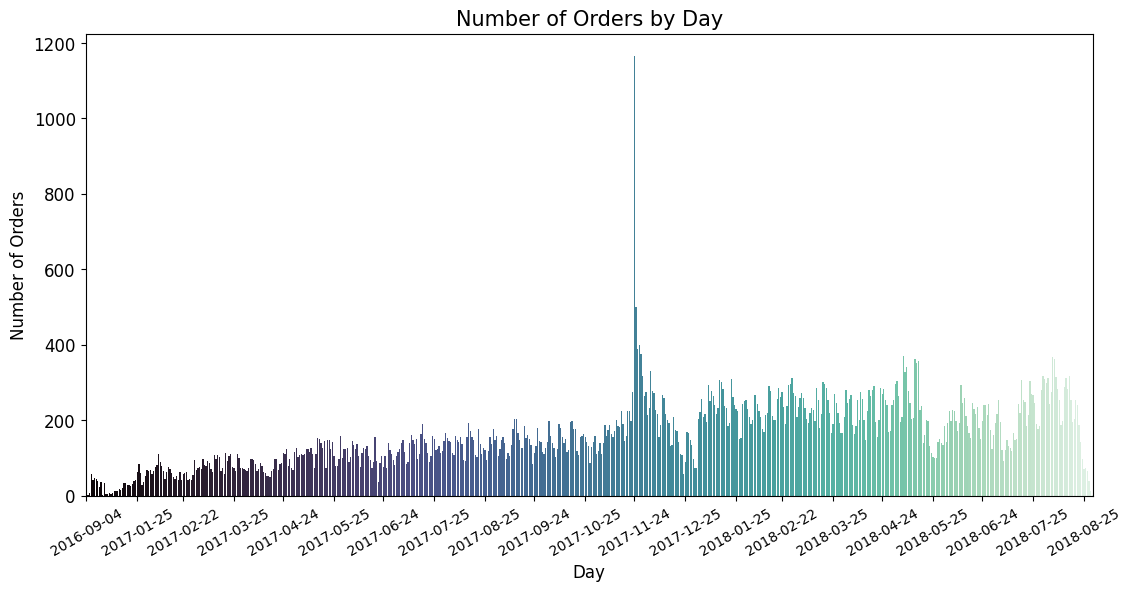

In [52]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.barplot(x = "day", y = "orders_count", data = orders_d, palette = 'mako')
plt.xlabel("Day", fontsize = 12)
plt.ylabel("Number of Orders", fontsize = 12)
plt.xticks(fontsize = 10, rotation=30)
plt.yticks(fontsize = 12)
plt.title("Number of Orders by Day", fontsize = 15)
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.show()

[Back to Start](#start)

### Growth of Total Number Unique Customers by Month <a class="anchor" id="section_3_4"></a>

In [53]:
customer_growth = pd.read_sql("""
SELECT   month
        ,new_customers
        ,sum(new_customers) OVER (ORDER BY month) as total_customers
        ,new_customers - LAG(new_customers, 1) OVER (ORDER by month) as new_cust_MoM
        ,100 *(new_customers - LAG(new_customers, 1) OVER (ORDER by month))/
                        LAG(new_customers, 1) OVER (ORDER by month) as growth_new_cust_MoM
FROM (
SELECT   strftime('%Y-%m', min_date) as month
        ,count(customer_unique_id) as new_customers
FROM (
SELECT   customers.customer_unique_id
        ,min(orders.order_purchase_timestamp) as min_date
FROM orders
LEFT JOIN customers ON customers.customer_id = orders.customer_id
GROUP BY customers.customer_unique_id) t1
GROUP BY month
ORDER BY month) t2
""", engine)
customer_growth

,month,new_customers,total_customers,new_cust_MoM,growth_new_cust_MoM
0,2016-09,4,4,NaN,NaN
1,2016-10,321,325,317.0,7925.0
2,2016-12,1,326,-320.0,-99.0
3,2017-01,764,1090,763.0,76300.0
4,2017-02,1752,2842,988.0,129.0
5,2017-03,2636,5478,884.0,50.0
6,2017-04,2352,7830,-284.0,-10.0
7,2017-05,3596,11426,1244.0,52.0
8,2017-06,3139,14565,-457.0,-12.0
9,2017-07,3894,18459,755.0,24.0


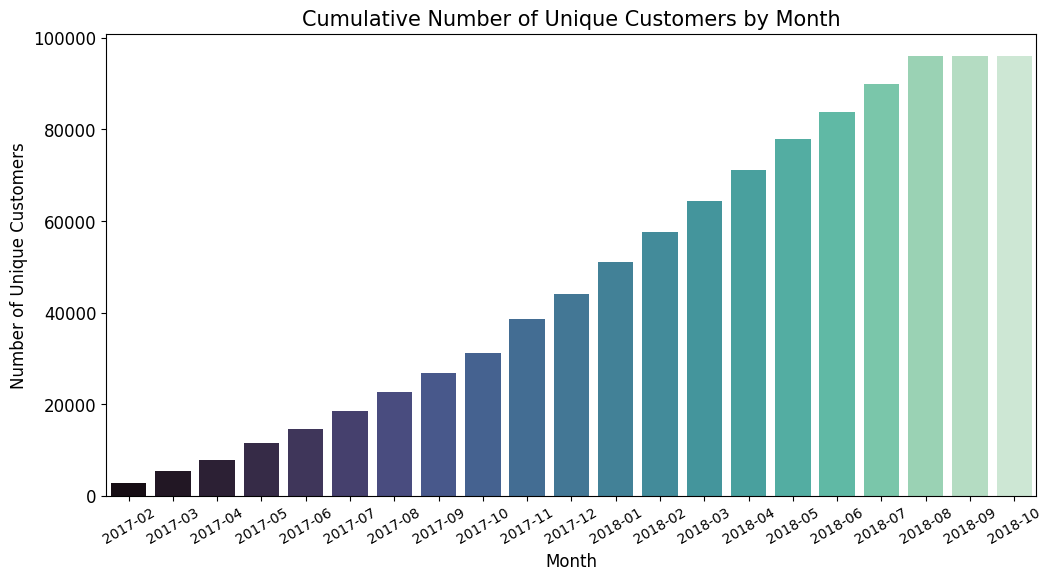

In [54]:
plt.figure(figsize = (12, 6))
sns.barplot(x = "month", y = "total_customers", data = customer_growth[4:], palette = 'mako')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Number of Unique Customers", fontsize = 12)
plt.xticks(fontsize = 10, rotation=30)
plt.yticks(fontsize = 12)
plt.title("Сumulative Number of Unique Customers by Month", fontsize = 15)
plt.show()

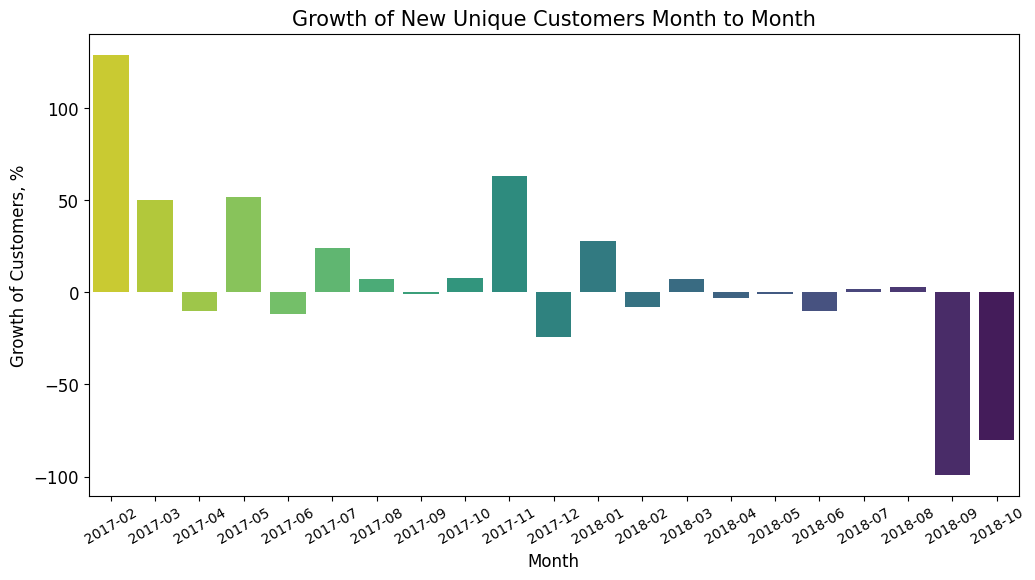

In [55]:
plt.figure(figsize = (12, 6))
sns.barplot(x = "month", y = "growth_new_cust_MoM", data = customer_growth[4:], palette = 'viridis_r')
plt.xlabel("Month", fontsize = 12)
plt.ylabel("Growth of Customers, %", fontsize = 12)
plt.xticks(fontsize = 10, rotation=30)
plt.yticks(fontsize = 12)
plt.title("Growth of New Unique Customers Month to Month", fontsize = 15)
plt.show()

[Back to Start](#start)

### Revenue by Payment Type <a class="anchor" id="section_3_5"></a>

In [56]:
payment_types = pd.read_sql("""
SELECT  order_payments.payment_type
       ,sum(order_payments.payment_value) as revenue
FROM orders
INNER JOIN order_payments ON order_payments.order_id = orders.order_id
WHERE orders.order_status not in ('canceled', 'unavailable')
GROUP BY order_payments.payment_type
""", engine)
payment_types

,payment_type,revenue
0,boleto,2.826802e+06
1,credit_card,1.235004e+07
2,debit_card,2.124177e+05
3,voucher,3.498744e+05


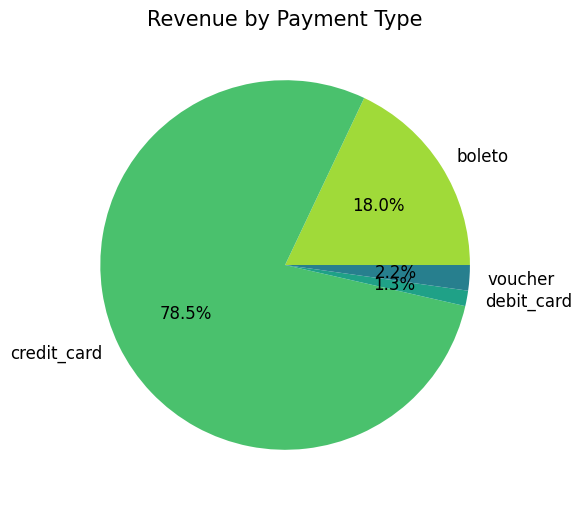

In [57]:
plt.figure(figsize = (12,6))
plt.pie(x = payment_types['revenue'], labels = payment_types['payment_type'], autopct = '%0.1f%%',
        colors = sns.color_palette('viridis_r'), textprops={'fontsize': 12})
plt.title('Revenue by Payment Type', fontsize = 15)
plt.show()

[Back to Start](#start)

### Number of Orders by Payment Type (with Combined) <a class="anchor" id="section_3_6"></a>

In [58]:
group_payment_types = pd.read_sql("""
SELECT  t.group_payment_type
       ,count(t.order_id) as orders_count
FROM (
SELECT  orders.order_id
       ,group_concat(distinct order_payments.payment_type) as group_payment_type
FROM orders
INNER JOIN order_payments ON order_payments.order_id = orders.order_id
WHERE orders.order_status not in ('canceled', 'unavailable')
GROUP BY orders.order_id) t
GROUP BY t.group_payment_type
ORDER BY orders_count DESC
""", engine)
group_payment_types

,group_payment_type,orders_count
0,credit_card,73407
1,boleto,19539
2,"credit_card,voucher",2210
3,voucher,1535
4,debit_card,1514
5,"credit_card,debit_card",1


[Back to Start](#start)

### Top 10 and Bottom 10 of Product Category by Revenue <a class="anchor" id="section_3_7"></a>

In [59]:
top_prod_category = pd.read_sql("""
SELECT  case when tP2.product_category_name_english is NULL then tP1.product_category_name
             else tP2.product_category_name_english end as product_category
       ,sum(order_payments.payment_value) as revenue
FROM orders
LEFT JOIN order_payments ON order_payments.order_id = orders.order_id
LEFT JOIN order_items ON order_items.order_id = orders.order_id
LEFT JOIN products as tP1 ON tP1.product_id = order_items.product_id
LEFT JOIN product_category as tP2 ON tP1.product_category_name = tP2.product_category_name
WHERE orders.order_status not in ('canceled', 'unavailable')
GROUP BY product_category
ORDER BY revenue DESC """, engine)
print(top_prod_category)

             product_category     revenue
0              bed_bath_table  1711258.08
1               health_beauty  1653730.45
2       computers_accessories  1571543.81
3             furniture_decor  1424782.52
4               watches_gifts  1421715.28
..                        ...         ...
69                   pc_gamer     1925.01
70             home_comfort_2     1710.54
71          cds_dvds_musicals     1199.43
72  fashion_childrens_clothes      785.67
73      security_and_services      324.51

[74 rows x 2 columns]


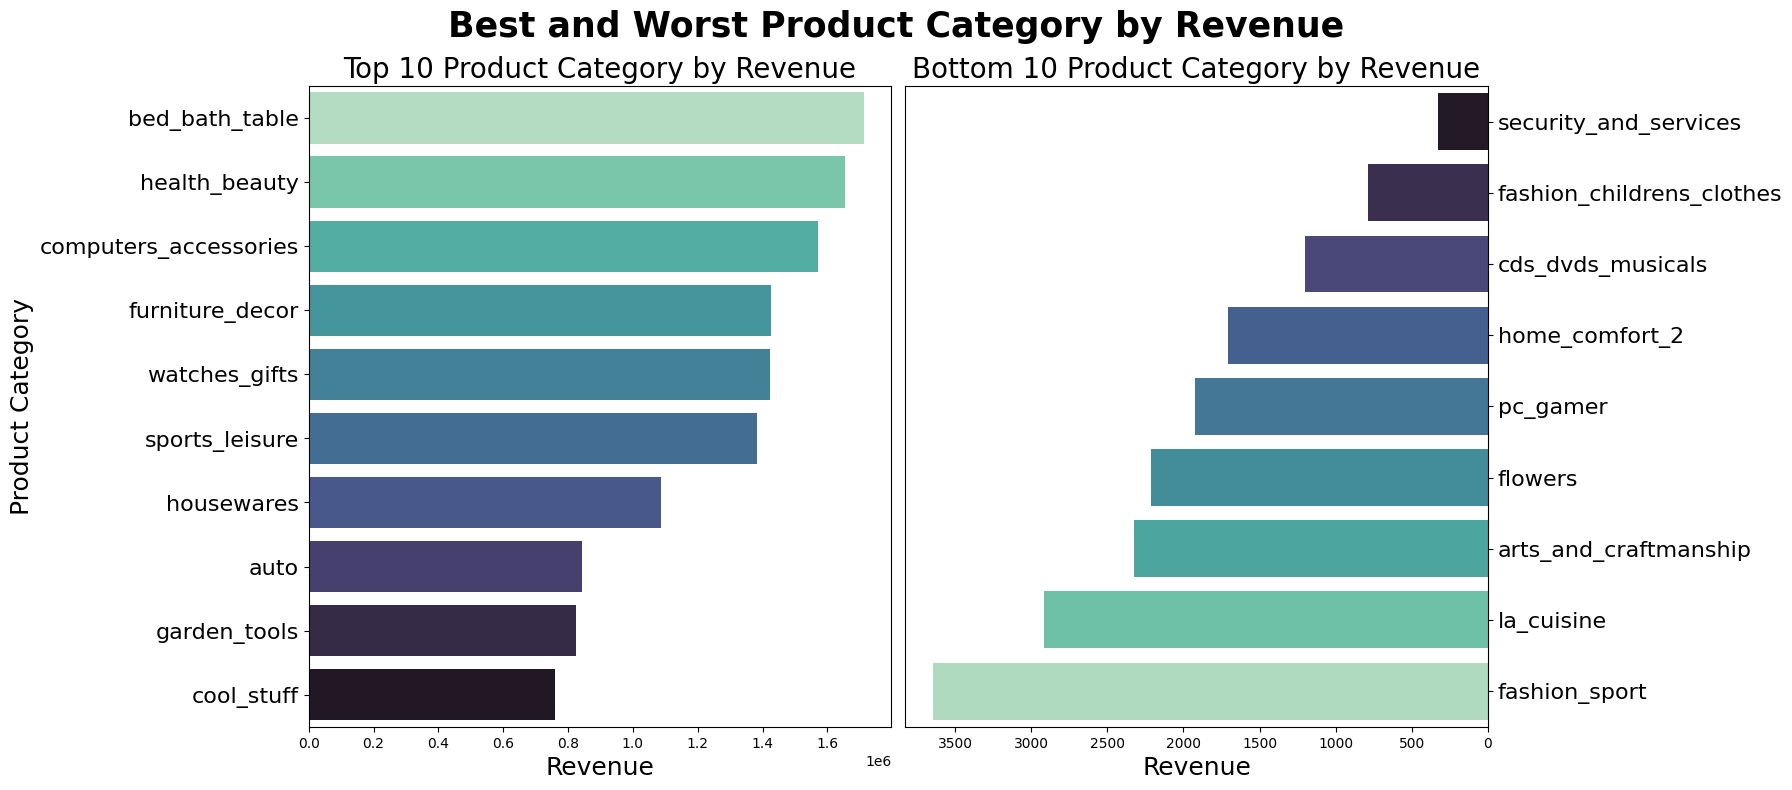

In [60]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))

sns.barplot(x = 'revenue', y = 'product_category', data = top_prod_category[:10],
            palette = 'mako_r', ax = ax[0])
ax[0].set_xlabel("Revenue", fontsize = 18)
ax[0].set_ylabel("Product Category", fontsize = 18)
ax[0].tick_params(axis = 'y', labelsize = 16)
ax[0].set_title("Top 10 Product Category by Revenue", fontsize = 20)

sns.barplot(x = 'revenue', y = 'product_category', data = top_prod_category[-1:-10:-1],
            palette = 'mako', ax = ax[1])
ax[1].set_xlabel("Revenue", fontsize = 18)
ax[1].set_ylabel("")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis = 'y', labelsize = 16)
ax[1].set_title("Bottom 10 Product Category by Revenue", fontsize = 20)

plt.suptitle("Best and Worst Product Category by Revenue", fontsize = 25, fontweight = "bold")
plt.tight_layout(pad = 1)
plt.show()

[Back to Start](#start)

## RFM Analysis <a class="anchor" id="chapter4"></a>

### About RFM Analysis <a class="anchor" id="section_4_1"></a>

RFM analysis is a method used in customer segmentation and marketing analytics to identify the group of customers based on the recency, the frequency and the monetary values of their purchases. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Recency: Measure the time elapsed since the customer's last purchase.

Frequency: Measure the number of purchases made by a customer.

Monetary Value: Measure the total amount spent by the customer.

### Calculation of Recency, Frequency and Monetary <a class="anchor" id="section_4_2"></a>

As this dataset has not been updated since 2018, for the correct calculation and analysis of "recency", the latest purchase date in the table "orders" was taken as a current date.

In [61]:
# Define the latest purchase date:
max_date = pd.read_sql("""
SELECT max(order_purchase_timestamp) FROM orders""", engine)
max_date

,max(order_purchase_timestamp)
0,2018-10-17 17:30:18


For customer segmentation there were taken all orders from "orders" table except "canceled" orders. "Unavailable" orders were not filtered because they reflect the customer"s intention to buy this or that product at the specified price.

"orders" table joined "order_payments" table by "INNER JOIN" in order to exclude 1 order for which there is no information in the "order_payments" table.

In [62]:
rfm = pd.read_sql("""
SELECT   customers.customer_unique_id as customer
        ,CAST(((SELECT julianday(max(order_purchase_timestamp)) FROM orders)
                - julianday(max(orders.order_purchase_timestamp))) as int) as recency
        ,COUNT(distinct orders.order_id) as frequency
        ,SUM(order_payments.payment_value) as monetary
FROM orders
INNER JOIN order_payments ON order_payments.order_id = orders.order_id
LEFT JOIN customers ON customers.customer_id = orders.customer_id
WHERE orders.order_status <> 'canceled'
GROUP BY customer
ORDER BY frequency DESC, monetary DESC """, engine)
rfm.head()

,customer,recency,frequency,monetary
0,8d50f5eadf50201ccdcedfb9e2ac8455,57,17,927.63
1,3e43e6105506432c953e165fb2acf44c,231,9,1172.66
2,ca77025e7201e3b30c44b472ff346268,138,7,1122.72
3,1b6c7548a2a1f9037c1fd3ddfed95f33,245,7,959.01
4,6469f99c1f9dfae7733b25662e7f1782,111,7,758.83


In [63]:
rfm.sort_values(['monetary'], ascending = False)

,customer,recency,frequency,monetary
2924,0a0a92112bd4c708ca5fde585afaa872,383,1,13664.08
236,da122df9eeddfedc1dc1f5349a1a690c,564,2,7571.63
2925,763c8b1c9c68a0229c42c9fc6f662b93,94,1,7274.88
2926,dc4802a71eae9be1dd28f5d788ceb526,611,1,6929.31
2927,459bef486812aa25204be022145caa62,83,1,6922.21
...,...,...,...,...
95554,2878e5b88167faab17d4fb83a986d38b,352,1,11.63
95555,6f5b9d1cdccc4d28f0483a612edecacf,410,1,11.63
95556,b33336f46234b24a613ad9064d13106d,117,1,10.89
95557,bd06ce0e06ad77a7f681f1a4960a3cc6,398,1,10.07


In [64]:
rfm.shape

(95559, 4)

[Back to Start](#start)

### RFM Score <a class="anchor" id="section_4_3"></a>

Distributions of Recency, Frequency, and Monetary:

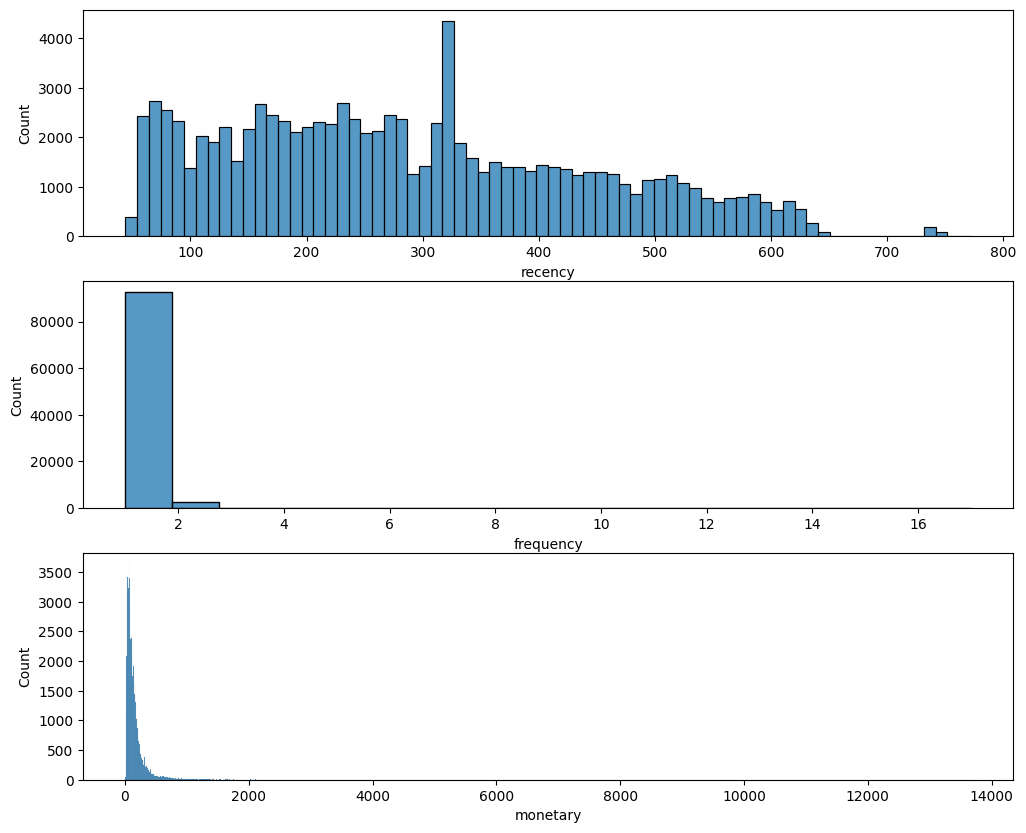

In [65]:
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.histplot(rfm['recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.histplot(rfm['frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.histplot(rfm['monetary'])
plt.show()

Some values look like outliers, but we shouldn't remove them (for customer segmentation, these values can be valuable).

In [66]:
rfm.describe()

,recency,frequency,monetary
count,95559.000000,95559.000000,95559.000000
mean,287.557457,1.034073,166.029537
std,153.116908,0.212155,227.762246
min,44.000000,1.000000,9.590000
25%,163.000000,1.000000,63.110000
50%,268.000000,1.000000,107.940000
75%,397.000000,1.000000,183.180000
max,772.000000,17.000000,13664.080000


Divide customers into 4 groups according to the quantiles of "recency" and "monetary".

Most of the customers (97%) has frequency equal to 1. So it was decided to split customers by frequency into 2 groups manually: who made only 1 order and more than 1 order.

In [67]:
rfm['R'] = pd.qcut(rfm['recency'], q=4, labels=[4, 3, 2, 1])
rfm['F'] = rfm.apply(lambda x: 1 if x['frequency'] == 1 else 2, axis=1)
rfm['M'] = pd.qcut(rfm['monetary'], q=4, labels=[1, 2, 3, 4])

rfm.head()

,customer,recency,frequency,monetary,R,F,M
0,8d50f5eadf50201ccdcedfb9e2ac8455,57,17,927.63,4,2,4
1,3e43e6105506432c953e165fb2acf44c,231,9,1172.66,3,2,4
2,ca77025e7201e3b30c44b472ff346268,138,7,1122.72,4,2,4
3,1b6c7548a2a1f9037c1fd3ddfed95f33,245,7,959.01,3,2,4
4,6469f99c1f9dfae7733b25662e7f1782,111,7,758.83,4,2,4


Add new column with total RFM-score.

In [68]:
rfm['RFM'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis=1)
rfm.head()

,customer,recency,frequency,monetary,R,F,M,RFM
0,8d50f5eadf50201ccdcedfb9e2ac8455,57,17,927.63,4,2,4,424
1,3e43e6105506432c953e165fb2acf44c,231,9,1172.66,3,2,4,324
2,ca77025e7201e3b30c44b472ff346268,138,7,1122.72,4,2,4,424
3,1b6c7548a2a1f9037c1fd3ddfed95f33,245,7,959.01,3,2,4,324
4,6469f99c1f9dfae7733b25662e7f1782,111,7,758.83,4,2,4,424


According to the RFM-score customers were devided into 32 (4 x 2 x 4) groups.

In [69]:
pd.pivot_table(rfm,
               index=["R"],
               columns=["F","M"],
               values=["customer"],
               aggfunc='count')

customer                                    
F        1                     2              
M        1     2     3     4   1   2    3    4
R                                             
4     5903  5665  5965  5571  14  80  186  539
3     5949  5703  5914  5531  14  71  191  505
2     5905  6093  5787  5484   9  80  189  443
1     6085  6121  5492  5467  16  72  166  349

[Back to Start](#start)

### Customer Segmentation <a class="anchor" id="section_4_4"></a>

Based on RFM scores, customers were aggregated into 9 customer segments (the number of segments depends on the needs of the company and how many personalized marketing campaigns it can offer).

| Customer Segment	| Behavior| Marketing Strategy |
| :- | :- | :- |
| Champions	| Bought recently, buy often and spend the most!	| Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions.	| Upsell higher value products. Ask for reviews. Engage them. |
| Potential Big Spenders	| Recent customers, spent a good amount, but bought once.	| Offer membership / loyalty program, recommend other products.|
| New	| Bought most recently, but not often and low spenders.	| Provide on-boarding support, give them early success, start building relationship.|
| Promising	| Recent shoppers, but haven’t spent much.	| Create brand awareness, offer free trials.|
| At Risk	| Spent big money and purchased often. But long time ago. Need to bring them back!	| Send personalized emails to reconnect, offer renewals, provide helpful resources.
| Can’t Lose Them	| Made biggest purchases, and often. But haven’t returned for a long time.	| Win them back via renewals or newer products, don’t lose them to competition, talk to them.
| Hibernating	| Last purchase was long back, low spenders and low number of orders.	| Offer other relevant products and special discounts. Recreate brand value.
| Lost	| Lowest recency, frequency and monetary scores.	| Revive interest with reach out campaign, ignore otherwise.|

In [70]:
# Define rfm_level function
def rfm_level(rfm):
    if (rfm['RFM'] in ['423','424']):
        return 'Champions'
    elif (rfm['RFM'] in ['322','323','324','422']):
        return 'Loyal'
    elif (rfm['RFM'] in ['411','412','421']):
        return 'New'
    elif (rfm['RFM'] in ['311','312','321']):
        return 'Promising'
    elif (rfm['RFM'] in ['313','314','413','414']):
        return 'Potential Big Spenders'
    elif (rfm['RFM'] in ['122','214','222','223','224']):
        return 'At Risk'
    elif (rfm['RFM'] in ['114','123','124']):
        return 'Can\'t Lose Them'
    elif (rfm['RFM'] in ['211','212', '213', '221']):
        return 'Hibernating'
    elif (rfm['RFM'] in ['111','112','113','121']):
        return 'Lost'

In [71]:
# Create a new variable RFM_Level
rfm['customer segment'] = rfm.apply(rfm_level, axis=1)
rfm.head(10)

,customer,recency,frequency,monetary,R,F,M,RFM,customer segment
0,8d50f5eadf50201ccdcedfb9e2ac8455,57,17,927.63,4,2,4,424,Champions
1,3e43e6105506432c953e165fb2acf44c,231,9,1172.66,3,2,4,324,Loyal
2,ca77025e7201e3b30c44b472ff346268,138,7,1122.72,4,2,4,424,Champions
3,1b6c7548a2a1f9037c1fd3ddfed95f33,245,7,959.01,3,2,4,324,Loyal
4,6469f99c1f9dfae7733b25662e7f1782,111,7,758.83,4,2,4,424,Champions
5,dc813062e0fc23409cd255f7f53c7074,55,6,1094.63,4,2,4,424,Champions
6,47c1a3033b8b77b3ab6e109eb4d5fdf3,266,6,944.21,3,2,4,324,Loyal
7,63cfc61cee11cbe306bff5857d00bfe4,142,6,826.32,4,2,4,424,Champions
8,de34b16117594161a6a89c50b289d35a,272,6,660.94,2,2,4,224,At Risk
9,f0e310a6839dce9de1638e0fe5ab282a,195,6,540.69,3,2,4,324,Loyal


In [72]:
# Calculate the average values for each customer segment, and return a size of each segment 
rfm_segment = rfm.groupby('customer segment', as_index = False)\
                 .agg({'recency': 'mean','frequency': 'mean','monetary': ['mean', 'count']})\
                 .round(1)
rfm_segment

customer segment recency frequency monetary       
                             mean      mean     mean  count
0                 At Risk   330.1       1.1    375.6   6268
1         Can't Lose Them   502.9       1.1    397.8   5982
2               Champions   107.1       2.2    356.9    725
3             Hibernating   326.9       1.0     89.4  17794
4                    Lost   501.8       1.0     87.4  17714
5                   Loyal   207.7       2.1    285.0    847
6                     New   105.2       1.0     63.2  11582
7  Potential Big Spenders   160.9       1.0    262.2  22981
8               Promising   216.5       1.0     63.0  11666

In [73]:
rfm_segment.columns = rfm_segment.columns.droplevel()
rfm_segment.columns = ['CustomerSegment','RecencyMean','FrequencyMean','MonetaryMean', 'Count']

Calculate the ratio - share of each customer segment of the total number of customers.

In [74]:
rfm_segment['Ratio'] = (100 * rfm_segment['Count']/rfm_segment['Count'].sum()).round(2)

In [75]:
rfm_segment = rfm_segment.sort_values(['Ratio'], ascending = False).reset_index(drop=True)
rfm_segment

,CustomerSegment,RecencyMean,FrequencyMean,MonetaryMean,Count,Ratio
0,Potential Big Spenders,160.9,1.0,262.2,22981,24.05
1,Hibernating,326.9,1.0,89.4,17794,18.62
2,Lost,501.8,1.0,87.4,17714,18.54
3,Promising,216.5,1.0,63.0,11666,12.21
4,New,105.2,1.0,63.2,11582,12.12
5,At Risk,330.1,1.1,375.6,6268,6.56
6,Can't Lose Them,502.9,1.1,397.8,5982,6.26
7,Loyal,207.7,2.1,285.0,847,0.89
8,Champions,107.1,2.2,356.9,725,0.76


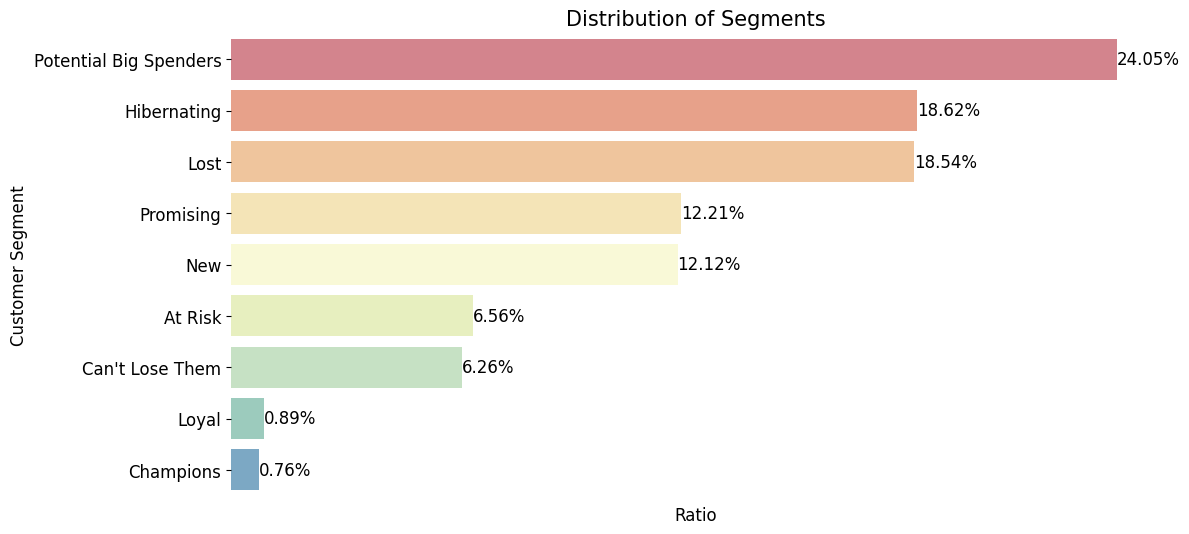

In [76]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = "Ratio", y = rfm_segment['CustomerSegment'], data = rfm_segment,
            palette = 'Spectral',alpha = 0.7, orient='h')
plt.xlabel("Ratio", fontsize = 12)
plt.ylabel("Customer Segment", fontsize = 12)
ax.bar_label(ax.containers[0], labels = rfm_segment['Ratio'].astype('str') + '%', fontsize = 12)
sns.despine(bottom = True, left = True)
plt.xticks([])
plt.yticks(fontsize = 12)
plt.title("Distribution of Segments", fontsize = 15)
plt.show()

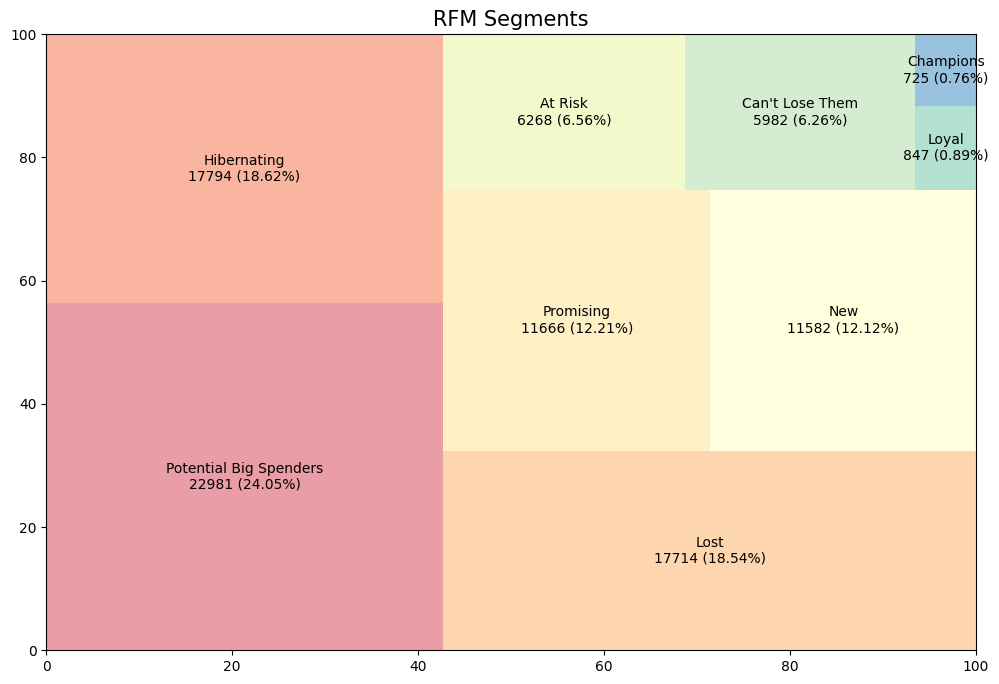

In [77]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 8)
squarify.plot(sizes = rfm_segment['Count'],
              color = sns.color_palette('Spectral',len(rfm_segment)),
              label = [f'{segment}\n{count} ({ratio}%)' for segment, count, ratio
                       in zip(rfm_segment.CustomerSegment, rfm_segment.Count,rfm_segment.Ratio)], alpha = 0.5)
plt.title("RFM Segments", fontsize = 15)
plt.axis('on')
plt.show()

[Back to Start](#start)